**Step Pengolahan Data**


1.   EDA
2.   Pre-Processing
3.   Modelling
4.   Model Tuning
5.   Kesimpulan



In [34]:
# import library
import pandas as pd
import numpy as np

#import visualization library
import matplotlib.pyplot as plt
import seaborn as sns

#import ML Data Pre-Processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, RobustScaler, StandardScaler

#import ML Model
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV

# Load Dataset

In [35]:
data = pd.read_csv('https://raw.githubusercontent.com/tyoamazinglib/data_batch32/main/Dataset2_House_Price.csv')

In [36]:
data.head(10)

,made,squareMeters,numberOfRooms,hasStorageRoom,hasGuestRoom,price
0,2005,75523,3,0,7,7559081.5
1,2015,80771,39,1,2,8085989.5
2,2021,55712,58,1,9,5574642.1
3,2012,32316,47,0,3,3232561.2
4,1990,70429,19,1,4,7055052.0
5,2012,39223,36,0,1,3926647.2
6,1995,58682,10,0,5,5876376.5
7,2003,86929,100,0,10,8696869.3
8,2012,51522,3,1,5,5154055.2
9,2021,39686,42,1,3,3970892.1


Kolom 'Price' berbanding lurus dengan kolom 'squareMeters'.

In [37]:
data.dtypes

made                int64
squareMeters        int64
numberOfRooms       int64
hasStorageRoom      int64
hasGuestRoom        int64
price             float64
dtype: object

In [38]:
data.shape

(10000, 6)

In [39]:
data.isna().sum()

made              0
squareMeters      0
numberOfRooms     0
hasStorageRoom    0
hasGuestRoom      0
price             0
dtype: int64

In [40]:
#Cek data duplikat
dd = data[data.duplicated]
print("Number of duplicates: ", dd.shape)

Number of duplicates:  (0, 6)


# EDA

In [41]:
data.describe()

,made,squareMeters,numberOfRooms,hasStorageRoom,hasGuestRoom,price
count,10000.00000,10000.00000,10000.000000,10000.000000,10000.00000,1.000000e+04
mean,2005.48850,49870.13120,50.358400,0.503000,4.99460,4.993448e+06
std,9.30809,28774.37535,28.816696,0.500016,3.17641,2.877424e+06
min,1990.00000,89.00000,1.000000,0.000000,0.00000,1.031350e+04
25%,1997.00000,25098.50000,25.000000,0.000000,2.00000,2.516402e+06
50%,2005.50000,50105.50000,50.000000,1.000000,5.00000,5.016180e+06
75%,2014.00000,74609.75000,75.000000,1.000000,8.00000,7.469092e+06
max,2021.00000,99999.00000,100.000000,1.000000,10.00000,1.000677e+07


Distribusi data normal karena nilai mean dan mediannya tidak memiliki perbedaan yang sinifikan.

<ipython-input-42-e977a4f75a1b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data["price"], kde=True, color="c")


Text(0.5, 1.0, 'Distribusi Harga Rumah')

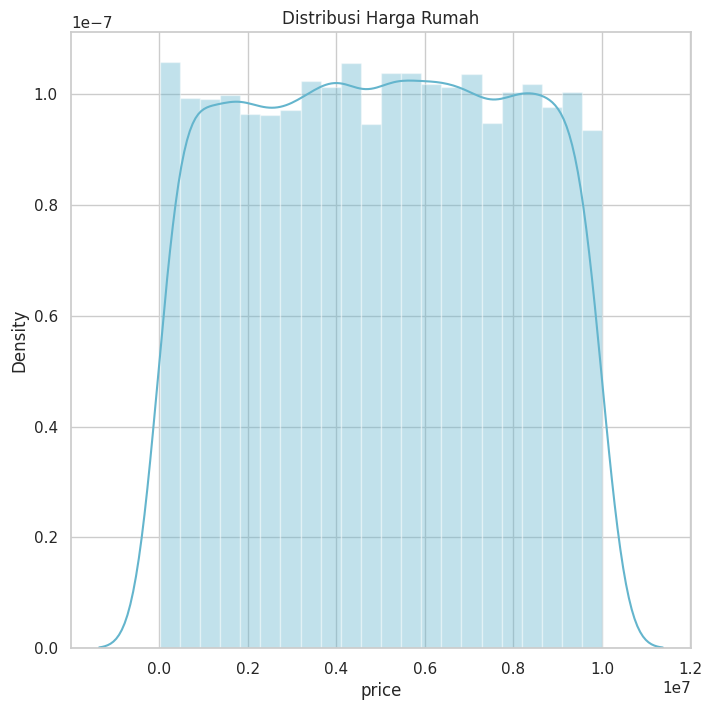

In [42]:
sns.set(style="whitegrid")
f, ax = plt.subplots(1,1, figsize=(8,8))
ax = sns.distplot(data["price"], kde=True, color="c")
plt.title("Distribusi Harga Rumah")

Hasil histogram plot di atas menunjukkan distribusi normal (Bell Curve)

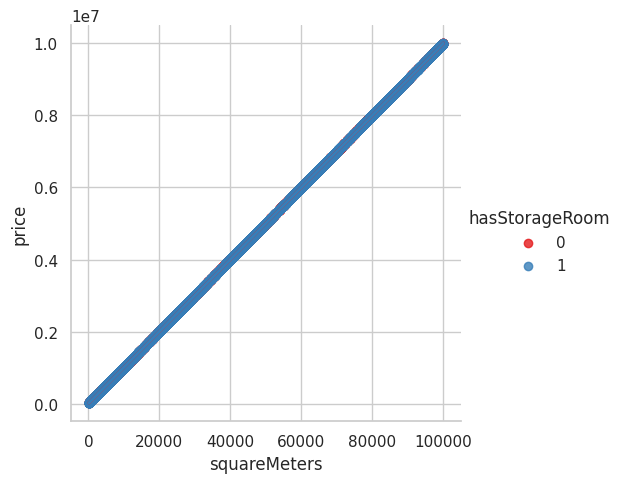

In [43]:
#Visualisasi SquareMeters dengan Proce --> Berdasarkan Observasi awal keduanya memiliki relasi yang cukup tinggi
ax = sns.lmplot(x = "squareMeters", y ="price", hue = "hasStorageRoom", data=data, palette = "Set1")

Visualisasi dari plot di atas menunjukkan hubungan yang signifikan antara kolom 'squareMeters' dengan kolom 'price', yang artinya semakin luas ukuran squareMeters maka harga dari rumah akan semakin mahal.

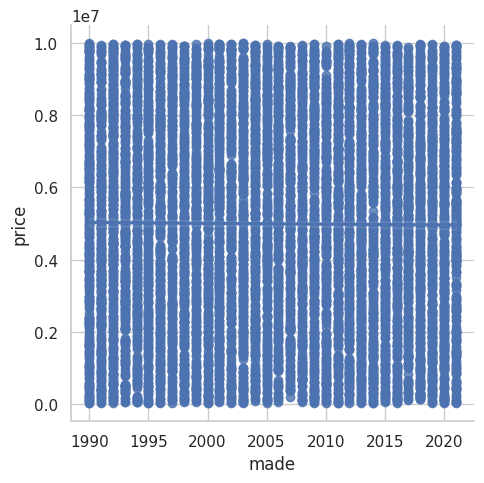

In [44]:
# Visualisasi Made dengan Price --> Berdasarkan observasi awal tidak ada hubungan yang signifikan
ax = sns.lmplot(x = "made", y ="price", data = data, palette = "Set1")

Visualisasi dari plot di atas antara kolom 'made' dengan 'price' tidak menunjukkan hubungan yang signifikan.

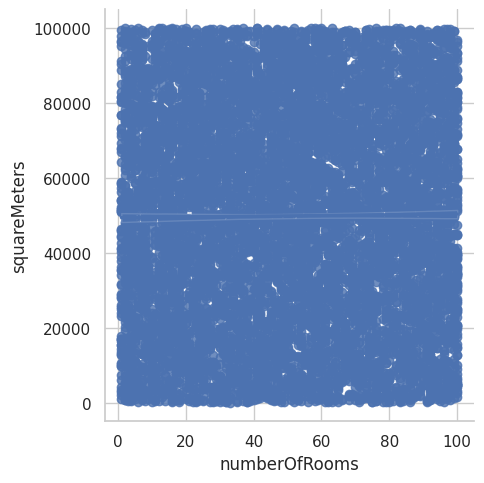

In [45]:
# Visualisasi untuk cek apakah kolom squareMeters memiliki pengaruh dengan bumberOfRooms
ax = sns.lmplot(x = "numberOfRooms", y ="squareMeters", data = data, palette = "Set1")


Visualisasi dari plot di atas antara kolom 'numberOfRooms' dan 'squareMeters' tidak menunjukkan hubungan yang signifikan.

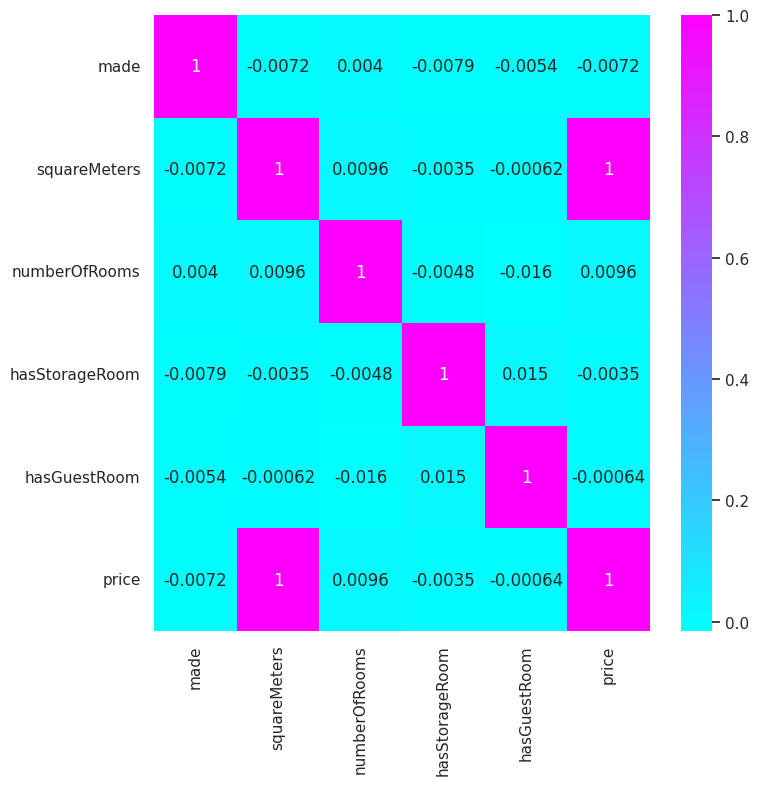

In [46]:
# Correlation matrix
f, ax = plt.subplots(1,1, figsize = (8,8))
ax = sns.heatmap(data.corr(), annot = True, cmap = "cool")

# Data Pre-processing

In [47]:
#Data sudah berbentuk int dan float (maka tidak perlu encoding)
dfc = data.copy()

#Lakukan scaling (jika perlu) --> Scaling digunakan jika skala/range antara kolom terlalu jauh
#Min max digunakan jika distribusi tidak normal, hasil scaling 0-1
scaler2 = MinMaxScaler()

#Standar Scaling kalo distribusi normal, hasil data -1-1
scaler = StandardScaler()

# Fit_transform untuk melakukan Standar scaling
scaled_data = scaler.fit_transform(dfc)

#Konversi hasil scaling ke dalam datafarame
stdr_data = pd.DataFrame(scaled_data, columns = dfc.columns)

print("Dataframe Setelah Scaling")
print(stdr_data)

#RobustScaling
scaler3 = RobustScaler()

Dataframe Setelah Scaling
          made  squareMeters  numberOfRooms  hasStorageRoom  hasGuestRoom  \
0    -0.052484      0.891562      -1.643518       -1.006018      0.631373   
1     1.021904      1.073956      -0.394180        0.994018     -0.942810   
2     1.666537      0.203033       0.265193        0.994018      1.261046   
3     0.699588     -0.610092      -0.116549       -1.006018     -0.627973   
4    -1.664066      0.714521      -1.088257        0.994018     -0.313136   
...        ...           ...            ...             ...           ...   
9995  0.377271     -1.673244       1.341012       -1.006018     -0.313136   
9996 -1.664066     -0.190009      -0.741218       -1.006018     -1.572483   
9997 -0.052484      1.180654      -1.643518        0.994018      1.261046   
9998  0.484710      0.318559       0.681639        0.994018     -0.313136   
9999 -1.234311     -1.683183       1.167493        0.994018      0.316537   

         price  
0     0.891687  
1     1.074814 

In [48]:
# Train test Split Data
x = stdr_data.drop(['price'],axis = 1) #Prediktor
y = stdr_data['price'] #Label
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

# Modelling

## Training and Testing Model
Komparasi antara training dan testing score

In [49]:
# Linear Regression
Lin_reg = LinearRegression()
Lin_reg.fit(x_train, y_train)
y_train_pred = Lin_reg.predict(x_train)
y_test_pred = Lin_reg.predict(x_test)
print("score:", Lin_reg.score(x_train, y_train))
print("score:", Lin_reg.score( x_test, y_test))

score: 0.9999987247687055
score: 0.9999986716413705


In [50]:
# Ridge Regression
ridge_model = Ridge()
ridge_model.fit(x_train, y_train)
y_train_pred = ridge_model.predict(x_train)
y_test_pred = ridge_model.predict(x_test)
print("score:", ridge_model.score(x_train, y_train))
print("score:", ridge_model.score( x_test, y_test))

score: 0.9999987093612637
score: 0.9999986644516466


In [51]:
# Lasso Regression
lasso_model = Lasso()
lasso_model.fit(x_train, y_train)
y_train_pred = lasso_model.predict(x_train)
y_test_pred = lasso_model.predict(x_test)
print("score:", lasso_model.score(x_train, y_train))
print("score:", lasso_model.score( x_test, y_test))

score: 0.01388742256238873
score: 0.012672186665306007


In [60]:
# Random Forest Regressor
rf_model = RandomForestRegressor()
rf_model.fit(x_train, y_train)
y_train_pred = rf_model.predict(x_train)
y_test_pred = rf_model.predict(x_test)
print("score:", rf_model.score(x_train, y_train))
print("score:", rf_model.score( x_test, y_test))

score: 0.9999997427561752
score: 0.9999979455126718


In [61]:
# KNN Regressor
knn_model = KNeighborsRegressor()
knn_model.fit(x_train, y_train)
y_train_pred = knn_model.predict(x_train)
y_test_pred = knn_model.predict(x_test)
print("score:", knn_model.score(x_train, y_train))
print("score:", knn_model.score( x_test, y_test))

score: 0.9937928708418309
score: 0.9908518606045846


In [62]:
# XGBoost Regressor
xgb_model = XGBRegressor()
xgb_model.fit(x_train, y_train)
y_train_pred = xgb_model.predict(x_train)
y_test_pred = xgb_model.predict(x_test)
print("score:", xgb_model.score(x_train, y_train))
print("score:", xgb_model.score( x_test, y_test))

score: 0.9999897675852828
score: 0.9999771137490183


# Model Tuning

In [57]:
#Model Tuning (untuk mencari parameter terbaik jika terdapat banyak parameter yang digunakan)
#Ridge Model
param_grid = {'alpha':[0.1,1,10,100], 'solver':['auto','svd','saga','lsqr','cholesqy']}

grid_search = GridSearchCV(ridge_model, param_grid,cv=5, scoring="neg_mean_squared_error")
grid_search.fit(x_train,y_train)

print("Parameter terbaik:", grid_search.best_params_)

#Prediksi
y_pred = grid_search.predict(x_test)

print("R2 score:", r2_score(y_test, y_pred))

Parameter terbaik: {'alpha': 0.1, 'solver': 'svd'}
R2 score: 0.9999986723120037


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py", line 1123, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/

In [58]:
ridge_model = Ridge(alpha=0.1, solver='svd')
ridge_model.fit(x_train, y_train)
print("Score", ridge_model.score(x_test, y_test))

Score 0.9999986723120037


In [63]:
#Random Forest Model
param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30]}

grid_search = GridSearchCV(rf_model, param_grid,cv=5, scoring="neg_mean_squared_error")
grid_search.fit(x_train,y_train)

print("Parameter terbaik:", grid_search.best_params_)

#Prediksi
y_pred = grid_search.predict(x_test)

print("R2 score:", r2_score(y_test, y_pred))

Parameter terbaik: {'max_depth': None, 'n_estimators': 300}
R2 score: 0.9999979602862201


In [64]:
#KNN Model
param_grid = {'n_neighbors': [3, 5, 7, 9]}

grid_search = GridSearchCV(knn_model, param_grid,cv=5, scoring="neg_mean_squared_error")
grid_search.fit(x_train,y_train)

print("Parameter terbaik:", grid_search.best_params_)

#Prediksi
y_pred = grid_search.predict(x_test)

print("R2 score:", r2_score(y_test, y_pred))

Parameter terbaik: {'n_neighbors': 9}
R2 score: 0.9914947153373426


In [65]:
#XGBoost Model
param_grid = {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 6, 9]}

grid_search = GridSearchCV(xgb_model, param_grid,cv=5, scoring="neg_mean_squared_error")
grid_search.fit(x_train,y_train)

print("Parameter terbaik:", grid_search.best_params_)

#Prediksi
y_pred = grid_search.predict(x_test)

print("R2 score:", r2_score(y_test, y_pred))

Parameter terbaik: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100}
R2 score: 0.9999800541309478


### Berdasarkan hasil di atas, kita akan mengambil model sebagai berikut:

1. **Ridge** dengan R2 score: 0.9999986723120037
2. **Random Forest** dengan R2 score: 0.9999979602862201
3. **XGBoost** dengan R2 score: 0.9999800541309478
4. **KNN** dengan R2 score: 0.9914947153373426

Karena model Ridge memiliki R2 score tertinggi yaitu 0.9999986723120037, yang menunjukkan bahwa model ini memiliki performa prediksi terbaik di antara model lainnya berdasarkan dataset yang digunakan. Random Forest dan XGBoost juga memiliki performa yang sangat baik, namun sedikit di bawah Ridge. Model KNN memiliki R2 score yang cukup baik tetapi tidak setinggi model lainnya. Oleh karena itu, kita memilih model Ridge sebagai model terbaik untuk prediksi harga rumah pada dataset ini.

In [72]:
# Save the best model using pickle
import pickle
pickle.dump(ridge_model,open('Ridge Regression.pkl','wb'))

In [ ]:
# Deployment
# Flask Deployment (app.py)
from flask import Flask, request, jsonify
import pickle
import numpy as np

app = Flask(__name__)

# Load the trained best model
model = pickle.load(open("Ridge Regression.pkl", "rb"))

@app.route('/')
def home():
    return "Welcome to the House Price Prediction API"

@app.route('/predict', methods=['POST'])
def predict():
    # Get data from the request
    data = request.json
    made = data['made']
    squareMeters = data['squareMeters']
    numberOfRooms = data['numberOfRooms']
    hasStorageRoom = data['hasStorageRoom']
    hasGuestRoom = data['hasGuestRoom']

    # Create input array for the model
    input_data = np.array([[made, squareMeters, numberOfRooms, hasStorageRoom, hasGuestRoom]])

    # Scale input data using the same scaler used in training
    input_data_scaled = scaler.transform(input_data)

    # Predict using the loaded model
    prediction = model.predict(input_data_scaled)

    return jsonify({'prediction': prediction[0]})

if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


# Kesimpulan

**Dari data diatas dapat disimpulkan bahwa:**

1. Data tersebut merupakan dataset yang berisi informasi tentang harga rumah berdasarkan beberapa fitur seperti tahun pembuatan, luas bangunan (dalam meter persegi), jumlah kamar, keberadaan ruang penyimpanan, dan keberadaan ruang tamu. Dataset ini memiliki variasi yang cukup besar dalam nilai-nilai fiturnya, seperti yang terlihat dari statistik deskriptif dan visualisasi yang dilakukan.

2. Model yang paling tepat adalah Ridge Regression dengan nilai R2 score yang mendekati 1, yaitu sekitar 0.9999986723120037. Hal ini menunjukkan bahwa model ini mampu melakukan prediksi harga rumah dengan sangat baik berdasarkan fitur-fitur yang ada dalam dataset.

3. Untuk perbaikan maka data ini harus dilakukan eksplorasi lebih lanjut terhadap fitur-fitur lain dengan memeriksa hubungan lebih dalam antara fitur-fitur yang ada dan harga rumah, serta mempertimbangkan penambahan fitur baru yang mungkin relevan seperti lokasi geografis, kondisi ekonomi daerah, dan lain-lain.





(Optional) Bisa menambahkan Model Deployment 1 dengan Flask untuk extra score.